In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.duplicated().sum()  

np.int64(0)

In [6]:
df.drop('Id',axis=1,inplace=True)

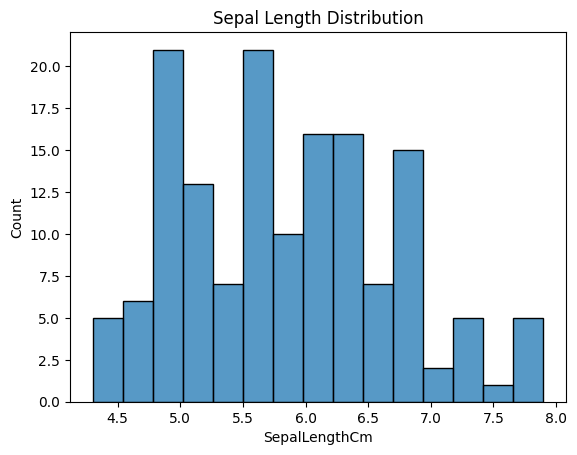

In [7]:
# EDA
sns.histplot(data=df,x='SepalLengthCm',bins=15)
plt.title('Sepal Length Distribution')
plt.show()

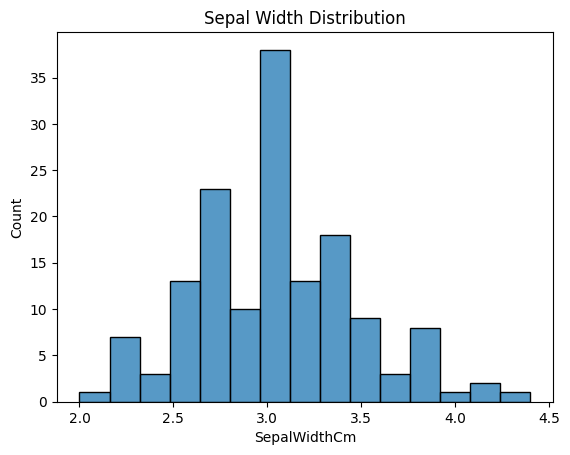

In [8]:
sns.histplot(data=df,x='SepalWidthCm',bins=15)
plt.title('Sepal Width Distribution')
plt.show()

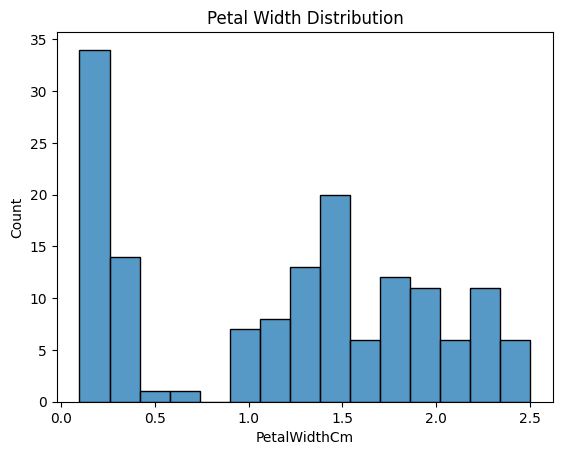

In [9]:
sns.histplot(data=df,x='PetalWidthCm',bins=15)
plt.title('Petal Width Distribution')
plt.show()

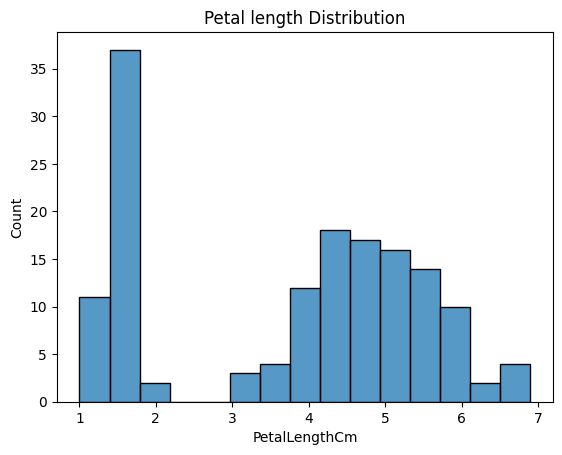

In [10]:
sns.histplot(data=df,x='PetalLengthCm',bins=15)
plt.title('Petal length Distribution')
plt.show()

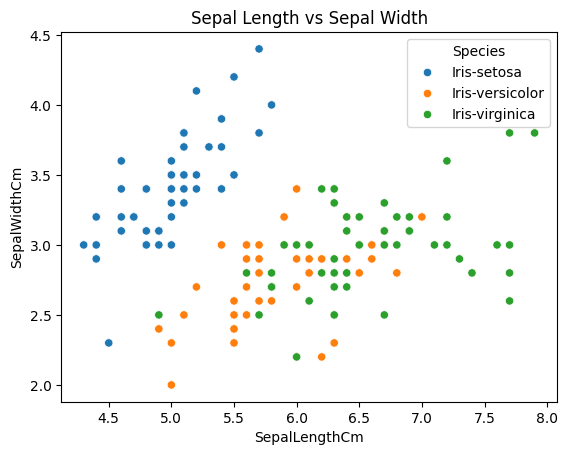

In [11]:
sns.scatterplot(data=df,x='SepalLengthCm',y='SepalWidthCm',hue='Species')
plt.title('Sepal Length vs Sepal Width')
plt.show()

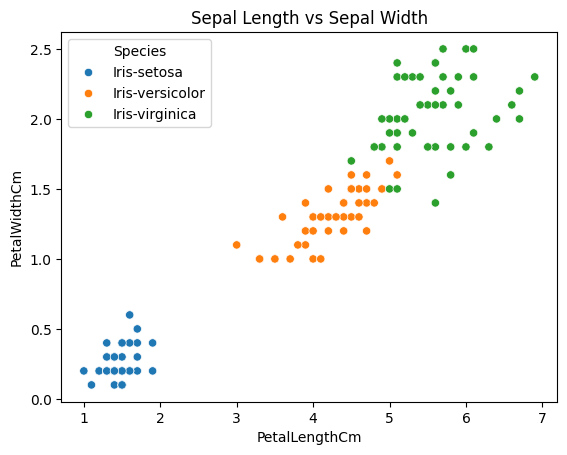

In [12]:
sns.scatterplot(data=df,x='PetalLengthCm',y='PetalWidthCm',hue='Species')
plt.title('Sepal Length vs Sepal Width')
plt.show()

In [13]:
corr = df.corr(numeric_only=True)
print(corr)


               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


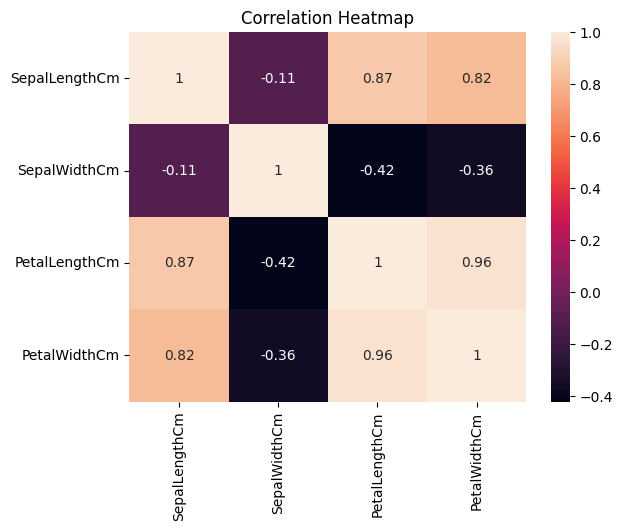

In [14]:
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
le = LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [16]:
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [17]:
x = df.drop('Species',axis=1)
y = df['Species']

In [18]:
scaled = StandardScaler()
x_scaled = scaled.fit_transform(x)

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [20]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [21]:
y_pred = model.predict(x_test)
print("Predicted values:", y_pred)

Predicted values: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [22]:
accuracy_score= accuracy_score(y_test,y_pred)
precision_score= precision_score(y_test,y_pred,average='macro')
f1_score= f1_score(y_test,y_pred,average='macro')
recall_score= recall_score(y_test,y_pred,average='macro')
print("Accuracy:",accuracy_score)
print("Precision:",precision_score)
print("F1 Score:",f1_score)
print("Recall:",recall_score)


Accuracy: 1.0
Precision: 1.0
F1 Score: 1.0
Recall: 1.0


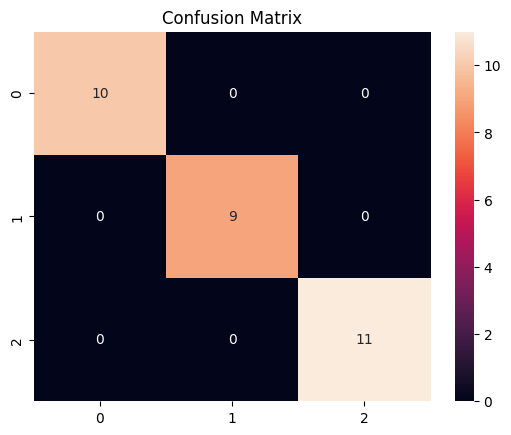

In [23]:
conf_metrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_metrix,annot=True)
plt.title('Confusion Matrix')
plt.show()

In [24]:
from sklearn.svm import SVC

In [25]:
model1 = SVC()
model1.fit(x_train,y_train)

SVC()

In [26]:
y_pred1 = model1.predict(x_test)


In [27]:
print(model.score(x_test,y_test))

1.0


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred1)   # ✅ function still intact
precision = precision_score(y_test, y_pred1, average='macro')
recall = recall_score(y_test, y_pred1, average='macro')
f1 = f1_score(y_test, y_pred1, average='macro')

print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
